### Fragment Molecule with GetMolFrags

In [32]:
from rdkit import Chem

# Example input molecule (you can replace this with any Mol object)
smiles = 'CCOC(=O)Cn1c(=O)sc2cccc(Cl)c21'
mol = Chem.MolFromSmiles(smiles)
print("Molecule:", smiles)
# Step 1: Get all the fragments as individual Mol objects
frags = Chem.GetMolFrags(mol, asMols=True, sanitizeFrags=True)

# Step 2: Now each fragment is a separate Mol object
for i, frag in enumerate(frags):
    print(f"Fragment {i+1}: {Chem.MolToSmiles(frag)}")


Molecule: CCOC(=O)Cn1c(=O)sc2cccc(Cl)c21
Fragment 1: CCOC(=O)Cn1c(=O)sc2cccc(Cl)c21


### Fragment Molecule with BRICS

In [23]:
from rdkit.Chem import BRICS
mol = Chem.MolFromSmiles(smiles)
print("Molecule:", smiles)
# BRICS decomposition returns SMILES fragments
BRICS_frags = BRICS.BRICSDecompose(mol)

# Convert back to Mol objects
frag_mols = [Chem.MolFromSmiles(f) for f in BRICS_frags]
for i, frag in enumerate(frag_mols):
    print(f"Fragment {i+1}: {Chem.MolToSmiles(frag)}")


Molecule: CCOC(=O)Cn1c(=O)sc2cccc(Cl)c21
Fragment 1: [4*]CC
Fragment 2: [3*]O[3*]
Fragment 3: [9*]n1c(=O)sc2cccc(Cl)c21
Fragment 4: [1*]C(=O)C[8*]


### Iteratively Removing Atoms

Molecule: CCOC(=O)Cn1c(=O)sc2cccc(Cl)c21


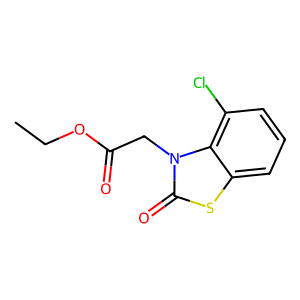

number of atoms: <rdkit.Chem._GetAtomsIterator object at 0x00000241EAD60940>


In [ ]:
from rdkit.Chem import Draw
#import matplotlib.pyplot as plt
from IPython.display import display

mol = Chem.MolFromSmiles(smiles)
print("Molecule:", smiles)

if mol is not None:
    img = Draw.MolToImage(mol)

display(img)
print("number of atoms:", len(mol.GetAtoms()))

Valid molecule after removal: COC(=O)Cn1c(=O)sc2cccc(Cl)c21


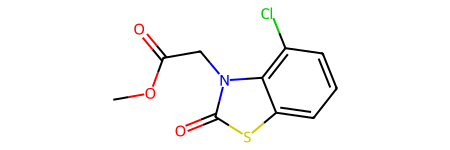

Valid molecule after removal: C.O=C(O)Cn1c(=O)sc2cccc(Cl)c21


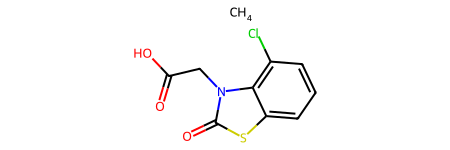

Valid molecule after removal: CC.O=CCn1c(=O)sc2cccc(Cl)c21


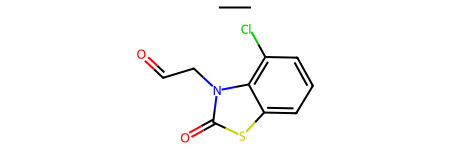

Valid molecule after removal: CCO.Cn1c(=O)sc2cccc(Cl)c21.O


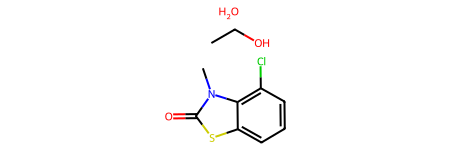

Valid molecule after removal: CCOCCn1c(=O)sc2cccc(Cl)c21


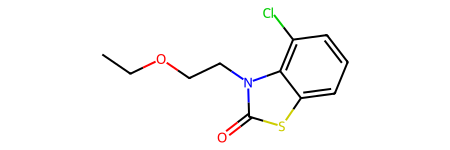

Molecule became invalid.
Molecule became invalid.
Molecule became invalid.
Molecule became invalid.
Molecule became invalid.
Molecule became invalid.
Molecule became invalid.
Molecule became invalid.
Molecule became invalid.
Molecule became invalid.
Valid molecule after removal: CCOC(=O)Cn1c(=O)sc2ccccc21


[18:05:33] Can't kekulize mol.  Unkekulized atoms: 5 9 10 11 12 13 15
[18:05:33] non-ring atom 6 marked aromatic
[18:05:33] non-ring atom 6 marked aromatic
[18:05:33] Can't kekulize mol.  Unkekulized atoms: 7 9 10 11 12 13 15
[18:05:33] non-ring atom 6 marked aromatic
[18:05:33] non-ring atom 6 marked aromatic
[18:05:33] non-ring atom 11 marked aromatic
[18:05:33] non-ring atom 11 marked aromatic
[18:05:33] non-ring atom 11 marked aromatic
[18:05:33] non-ring atom 11 marked aromatic


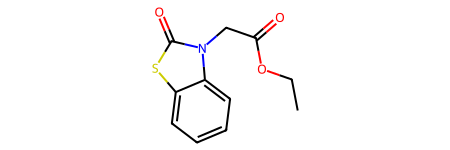

Molecule became invalid.


[18:05:33] non-ring atom 6 marked aromatic


In [28]:
def remove_atom_by_idx(mol, idx):
    mol_edit = Chem.RWMol(mol)
    mol_edit.RemoveAtom(idx)
    return mol_edit.GetMol()


for atom in range(len(mol.GetAtoms())):
    new_mol = remove_atom_by_idx(mol, atom)
    try:
        Chem.SanitizeMol(new_mol)
        print("Valid molecule after removal:", Chem.MolToSmiles(new_mol))
        display(new_mol)
    except:
        print("Molecule became invalid.")



In [ ]:
pattern = Chem.MolFromSmarts(smiles)
matches = mol.GetSubstructMatches(pattern)

for match in matches:
    print(f"Phenyl match at atoms: {match}")


Phenyl match at atoms: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)


### Fragment On Bonds


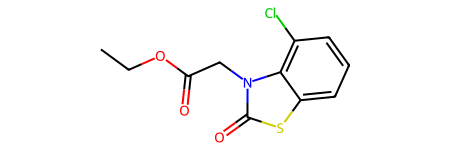

In [37]:
display(mol)

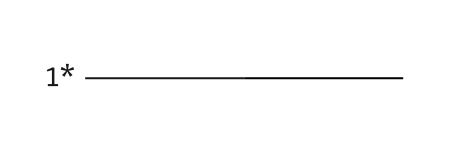

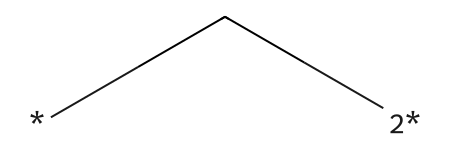

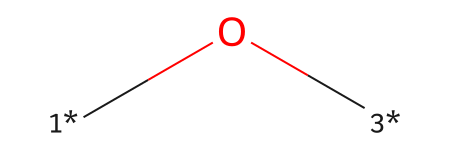

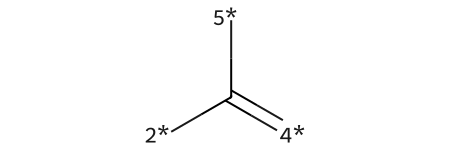

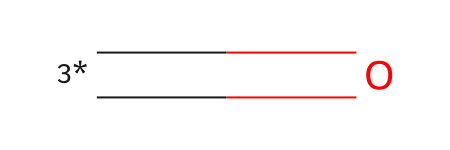

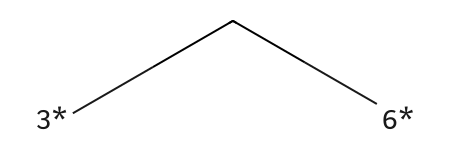

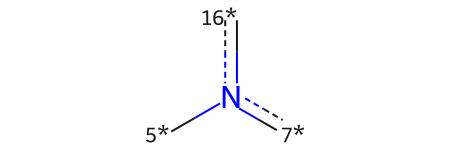

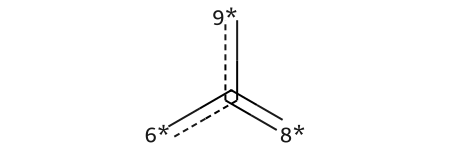

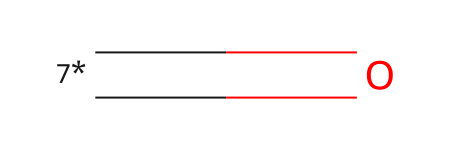

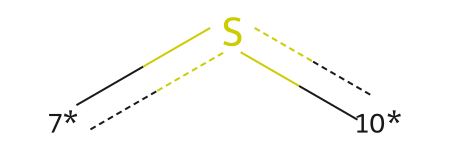

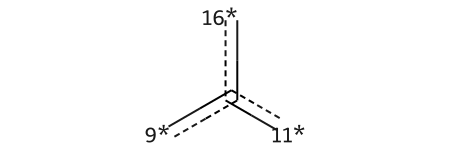

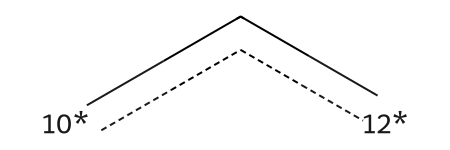

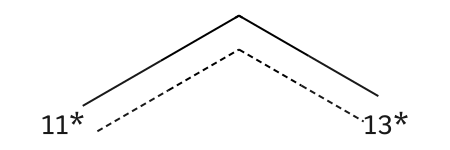

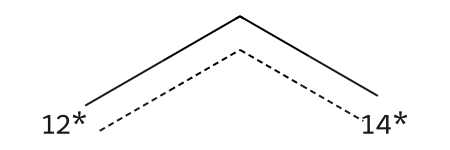

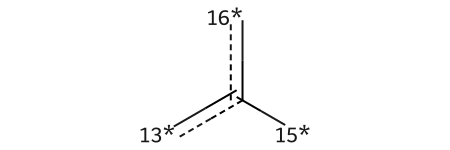

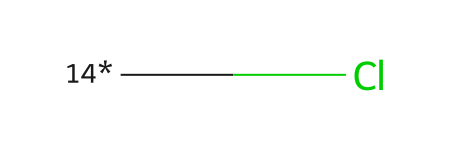

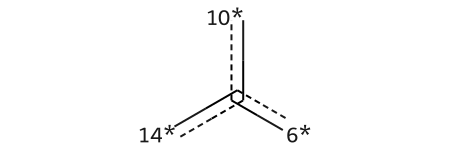

In [36]:
def generate_bond_cleavage_fragments(mol):
    """Generate fragments by breaking bonds"""
    # Break all breakable bonds
    frags = Chem.FragmentOnBonds(mol, bondIndices=list(range(mol.GetNumBonds())), addDummies=True)
    # Get individual fragments
    frags = Chem.GetMolFrags(frags, asMols=True, sanitizeFrags=False)
    return frags

    """ def generate_synthons(mol):
    #Generate synthons by breaking retrosynthetically interesting bonds
    from rdkit.Chem import Recap
    return [node.mol for node in Recap.RecapDecompose(mol).GetAllChildren().values()] 
    """

smiles = 'CCOC(=O)Cn1c(=O)sc2cccc(Cl)c21'
mol = Chem.MolFromSmiles(smiles)
fragments = generate_bond_cleavage_fragments(mol)

for fragment in fragments:
    display(fragment)

